In [71]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
import matplotlib.pyplot as plt #matplotlibの呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ

In [72]:
#emotion_labelデータの読みこみ

data1_a_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_A_20201111_1_datetime.csv')
data1_b_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_B_20201111_1_datetime.csv')
data1_c_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_C_20201111_1_datetime.csv')
data1_d_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_D_20201111_1_datetime.csv')
data2_a_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_A_20201111_2_datetime.csv')
data2_b_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_B_20201111_2_datetime.csv')
data2_c_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_C_20201111_2_datetime.csv')
data2_d_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_D_20201111_2_datetime.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature = pd.read_csv('feature/feature_record/data1_a_record_all_feature_kai.csv')
data1_b_record_all_feature = pd.read_csv('feature/feature_record/data1_b_record_all_feature_kai.csv')
data1_c_record_all_feature = pd.read_csv('feature/feature_record/data1_c_record_all_feature_kai.csv')
data1_d_record_all_feature = pd.read_csv('feature/feature_record/data1_d_record_all_feature_kai.csv')

data2_a_record_all_feature = pd.read_csv('feature/feature_record/data2_a_record_all_feature_kai.csv')
data2_b_record_all_feature = pd.read_csv('feature/feature_record/data2_b_record_all_feature_kai.csv')
data2_c_record_all_feature = pd.read_csv('feature/feature_record/data2_c_record_all_feature_kai.csv')
data2_d_record_all_feature = pd.read_csv('feature/feature_record/data2_d_record_all_feature_kai.csv')

feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_a_record_all_feature)
display(data1_a_label)

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,9998.335000,258.181667,-2049.087500,181.728333,156.875000,133.315000,52409.379442,1.746391e+05,1.473336e+05,4.062747e+05,...,9012,-1797,-3188,-1501,-2919,-714,5.474096,105.946434,0.391007,424.369393
1,9988.396147,-1482.352596,-417.927973,99.530988,109.263819,46.846734,56674.292816,1.507672e+06,1.471838e+06,5.114347e+05,...,9012,-3279,-3188,-2116,-2919,-1299,3.519062,68.643399,0.195503,731.844476
2,10006.765833,454.154167,-1875.742500,-172.144167,167.157500,26.727500,97054.629333,2.309472e+05,4.749566e+05,1.379440e+06,...,8636,-991,-5263,-3818,-3474,-1312,4.301075,102.798056,0.195503,1016.143629
3,10050.179167,537.580000,-1673.445833,-2.548333,71.064167,-14.918333,105807.973733,3.295087e+04,3.128601e+05,1.103094e+05,...,8895,-50,-3498,-1122,-4005,-616,3.519062,176.741429,0.195503,401.585970
4,9940.395833,458.375000,-2183.914167,3.536667,139.570833,-21.537500,38400.015816,6.599309e+04,4.496535e+05,1.077478e+05,...,9369,-130,-3471,-1299,-980,-464,5.474096,59.129200,0.195503,193.543279
5,10024.157500,465.665000,-1885.902500,11.180000,33.615000,-24.192500,14046.992694,2.434810e+04,5.583676e+04,2.556129e+04,...,9528,87,-2568,-476,-804,-305,5.474096,67.554886,0.391007,164.132561
6,10050.977500,-449.840000,-731.755000,97.999167,358.979167,74.521667,71181.443660,4.705418e+05,2.614875e+06,3.204263e+05,...,9147,-1589,-3816,-1379,-1346,-568,5.083089,112.589723,0.195503,786.913472
7,10207.465833,-474.429167,199.729167,-67.799167,-86.854167,-123.122500,25507.580499,1.701357e+05,4.122071e+05,1.307799e+05,...,9503,-1162,-2126,-1665,-1566,-1007,5.278592,103.064598,0.195503,291.181454
8,9991.839167,370.172500,-2066.148333,17.594167,31.067500,-19.690833,14029.124966,3.333887e+04,5.668753e+04,8.685692e+04,...,9640,-142,-2773,-677,-1194,-391,5.474096,54.354041,5.669599,86.277245
9,10045.382500,462.569167,-1791.300833,15.155000,36.868333,-19.353333,5291.212860,5.130715e+03,1.008278e+04,1.603922e+04,...,9747,190,-2133,-391,-840,-330,6.451613,28.608530,0.195503,78.073352


,timeHMS,emotion_level,subject
0,2020-11-11 12:40:17,1,D
1,2020-11-11 12:40:21,1,B
2,2020-11-11 12:40:28,2,C
3,2020-11-11 12:40:37,1,B
4,2020-11-11 12:40:54,0,B
5,2020-11-11 12:41:04,3,D
6,2020-11-11 12:41:27,1,B
7,2020-11-11 12:41:36,3,B
8,2020-11-11 12:42:19,2,C
9,2020-11-11 12:42:59,1,B


In [73]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label = data1_a_label.drop(["timeHMS", "subject"], axis=1)
data1_b_label = data1_b_label.drop(["timeHMS", "subject"], axis=1)
data1_c_label = data1_c_label.drop(["timeHMS", "subject"], axis=1)
data1_d_label = data1_d_label.drop(["timeHMS", "subject"], axis=1)
data2_a_label = data2_a_label.drop(["timeHMS", "subject"], axis=1)
data2_b_label = data2_b_label.drop(["timeHMS", "subject"], axis=1)
data2_c_label = data2_c_label.drop(["timeHMS", "subject"], axis=1)
data2_d_label = data2_d_label.drop(["timeHMS", "subject"], axis=1)

#確認
data1_a_label

,emotion_level
0,1
1,1
2,2
3,1
4,0
5,3
6,1
7,3
8,2
9,1


In [74]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature = pd.concat([data1_a_record_all_feature, data1_a_label], axis=1, ignore_index=False)
data1_b_record_all_feature = pd.concat([data1_b_record_all_feature, data1_b_label], axis=1, ignore_index=False)
data1_c_record_all_feature = pd.concat([data1_c_record_all_feature, data1_c_label], axis=1, ignore_index=False)
data1_d_record_all_feature = pd.concat([data1_d_record_all_feature, data1_d_label], axis=1, ignore_index=False)

data2_a_record_all_feature = pd.concat([data2_a_record_all_feature, data2_a_label], axis=1, ignore_index=False)
data2_b_record_all_feature = pd.concat([data2_b_record_all_feature, data2_b_label], axis=1, ignore_index=False)
data2_c_record_all_feature = pd.concat([data2_c_record_all_feature, data2_c_label], axis=1, ignore_index=False)
data2_d_record_all_feature = pd.concat([data2_d_record_all_feature, data2_d_label], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature)

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,9998.335000,258.181667,-2049.087500,181.728333,156.875000,133.315000,52409.379442,1.746391e+05,1.473336e+05,4.062747e+05,...,-1797,-3188,-1501,-2919,-714,5.474096,105.946434,0.391007,424.369393,1
1,9988.396147,-1482.352596,-417.927973,99.530988,109.263819,46.846734,56674.292816,1.507672e+06,1.471838e+06,5.114347e+05,...,-3279,-3188,-2116,-2919,-1299,3.519062,68.643399,0.195503,731.844476,1
2,10006.765833,454.154167,-1875.742500,-172.144167,167.157500,26.727500,97054.629333,2.309472e+05,4.749566e+05,1.379440e+06,...,-991,-5263,-3818,-3474,-1312,4.301075,102.798056,0.195503,1016.143629,2
3,10050.179167,537.580000,-1673.445833,-2.548333,71.064167,-14.918333,105807.973733,3.295087e+04,3.128601e+05,1.103094e+05,...,-50,-3498,-1122,-4005,-616,3.519062,176.741429,0.195503,401.585970,1
4,9940.395833,458.375000,-2183.914167,3.536667,139.570833,-21.537500,38400.015816,6.599309e+04,4.496535e+05,1.077478e+05,...,-130,-3471,-1299,-980,-464,5.474096,59.129200,0.195503,193.543279,0
5,10024.157500,465.665000,-1885.902500,11.180000,33.615000,-24.192500,14046.992694,2.434810e+04,5.583676e+04,2.556129e+04,...,87,-2568,-476,-804,-305,5.474096,67.554886,0.391007,164.132561,3
6,10050.977500,-449.840000,-731.755000,97.999167,358.979167,74.521667,71181.443660,4.705418e+05,2.614875e+06,3.204263e+05,...,-1589,-3816,-1379,-1346,-568,5.083089,112.589723,0.195503,786.913472,1
7,10207.465833,-474.429167,199.729167,-67.799167,-86.854167,-123.122500,25507.580499,1.701357e+05,4.122071e+05,1.307799e+05,...,-1162,-2126,-1665,-1566,-1007,5.278592,103.064598,0.195503,291.181454,3
8,9991.839167,370.172500,-2066.148333,17.594167,31.067500,-19.690833,14029.124966,3.333887e+04,5.668753e+04,8.685692e+04,...,-142,-2773,-677,-1194,-391,5.474096,54.354041,5.669599,86.277245,2
9,10045.382500,462.569167,-1791.300833,15.155000,36.868333,-19.353333,5291.212860,5.130715e+03,1.008278e+04,1.603922e+04,...,190,-2133,-391,-840,-330,6.451613,28.608530,0.195503,78.073352,1


In [75]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が0より大きいときはpositive
# emotion_levelの列の数値が0のときはneutral
# emotion_levelの列の数値が0より小さいときはnegative

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 0, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] == 0, "label"] = "neutral"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] < 0, "label"] = "negative"
    return data_record_all_feature

data1_a_record_all_feature = emotion_level_define(data1_a_record_all_feature)
data1_b_record_all_feature = emotion_level_define(data1_b_record_all_feature)
data1_c_record_all_feature = emotion_level_define(data1_c_record_all_feature)
data1_d_record_all_feature = emotion_level_define(data1_d_record_all_feature)
data2_a_record_all_feature = emotion_level_define(data2_a_record_all_feature)
data2_b_record_all_feature = emotion_level_define(data2_b_record_all_feature)
data2_c_record_all_feature = emotion_level_define(data2_c_record_all_feature)
data2_d_record_all_feature = emotion_level_define(data2_d_record_all_feature)

In [76]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature

data1_a_record_all_feature = emotion_level_drop(data1_a_record_all_feature)
data1_b_record_all_feature = emotion_level_drop(data1_b_record_all_feature)
data1_c_record_all_feature = emotion_level_drop(data1_c_record_all_feature)
data1_d_record_all_feature = emotion_level_drop(data1_d_record_all_feature)
data2_a_record_all_feature = emotion_level_drop(data2_a_record_all_feature)
data2_b_record_all_feature = emotion_level_drop(data2_b_record_all_feature)
data2_c_record_all_feature = emotion_level_drop(data2_c_record_all_feature)
data2_d_record_all_feature = emotion_level_drop(data2_d_record_all_feature)

In [77]:
data2_d_record_all_feature

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,10142.650000,343.620000,1621.766667,-63.527500,163.640000,-3.864167,30412.960833,16355.895600,165653.593889,124827.332577,...,-266,443,-1835,-1914,-483,18.377322,47.410292,1.368524,213.326819,positive
1,10092.406667,388.132500,2161.049167,-57.345833,32.237500,6.192500,15934.436289,9236.989944,74879.341749,69935.456233,...,-2,1049,-1073,-1024,-190,17.595308,35.713740,1.368524,143.139245,positive
2,10126.939167,410.106667,1811.857500,-73.885000,158.449167,7.210000,10864.778799,8336.125289,146124.203860,111899.933442,...,59,624,-1055,-1024,-178,0.195503,31.739642,0.391007,180.436109,positive
3,10132.908333,579.280833,1633.940833,-56.748333,78.001667,0.577500,8269.669931,21521.401966,87887.458999,84095.923331,...,-56,675,-1457,-975,-465,5.865103,26.398754,0.586510,160.108061,positive
4,10127.510833,574.937500,1693.602500,-78.015833,118.488333,10.312500,12413.331549,11350.316927,103519.011160,81559.097249,...,252,797,-1079,-1133,-258,4.887586,39.827525,0.586510,205.902270,positive
5,10082.742500,466.841667,2174.446667,-32.846667,-15.987500,4.543333,14540.751194,7470.984931,154429.587156,86280.748156,...,140,1168,-1097,-1097,-239,18.963832,31.005959,1.173021,201.447484,positive
6,10107.199167,711.060000,1853.434167,-51.432500,45.020833,6.638333,8058.177833,14914.024733,57281.238999,86824.532110,...,232,1127,-915,-688,-264,6.647116,33.114840,2.737048,96.931831,positive
7,10103.295000,736.291667,1837.468333,-49.471667,55.180833,-5.636667,11392.142975,14662.976597,70938.562331,103866.725864,...,164,1024,-1707,-1792,-416,5.669599,27.189701,0.391007,192.969427,positive
8,10129.410000,608.568333,1625.971667,-64.396667,82.486667,8.491667,7547.373567,13011.645331,72788.210864,98392.039322,...,30,605,-1341,-725,-331,6.060606,27.882975,0.391007,225.063209,positive
9,10133.280833,754.998333,1257.175833,-49.909167,165.212500,9.784167,14025.260299,14239.709997,188020.068249,226085.025916,...,137,-90,-2268,-1146,-434,6.451613,40.548317,0.391007,325.489131,positive


In [78]:
#全データを連結
all_data_feature = pd.concat([data1_a_record_all_feature, data1_b_record_all_feature, data1_c_record_all_feature, data1_d_record_all_feature, data2_a_record_all_feature, data2_b_record_all_feature, data2_c_record_all_feature, data2_d_record_all_feature], ignore_index=False)
all_data_feature = all_data_feature.reset_index(drop=True)
all_data_feature

all_data_feature = pd.concat([all_data_feature, feature_emg],axis=1, ignore_index=False)
col = all_data_feature.columns.tolist()
col.remove("label")
col.append("label")
all_data_feature = all_data_feature[col]

#全データからpositiveの数を確認
all_data_feature_positive = all_data_feature[all_data_feature.label == "positive"]
all_data_feature_positive = all_data_feature_positive.reset_index(drop=True)
all_data_feature_positive = all_data_feature_positive.head(16)
print(len(all_data_feature_positive))

#全データからnegativeの数を確認
all_data_feature_neutral = all_data_feature[all_data_feature.label == "neutral"]
all_data_feature_neutral = all_data_feature_neutral.reset_index(drop=True)
all_data_feature_neutral = all_data_feature_neutral.head(16)
print(len(all_data_feature_neutral))

#全データからneutralの数を確認
all_data_feature_negative = all_data_feature[all_data_feature.label == "negative"]
all_data_feature_negative = all_data_feature_negative.reset_index(drop=True)
print(len(all_data_feature_negative))

#データセットの準備
#positiveとnegative↓
# all_data_feature = pd.concat([all_data_feature_negative, all_data_feature_positive], ignore_index=False)

#positiveとnegativeとneutral↓
all_data_feature = pd.concat([all_data_feature_negative, all_data_feature_neutral, all_data_feature_positive], ignore_index=False)
all_data_feature = all_data_feature.reset_index(drop=True)
display(all_data_feature)

16
16
16


,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,gyrn_max_peak,emg,VLF,LF,HF1,HF2,HF3,HF4,HF5,label
0,9988.052500,416.828333,-2076.200833,16.891667,12.919167,-23.795833,19706.016410,6.759053e+04,1.086936e+05,2.161581e+05,...,159.298046,131187.789,4.589765e+05,30211.260738,6.032480e+04,8.199369e+04,9.899893e+04,1.118292e+05,1.221439e+05,negative
1,7436.756667,-652.391667,-6028.240833,-55.283333,53.660000,2.274167,34787.255789,1.728219e+04,6.712495e+04,9.654278e+04,...,200.744785,235525.229,4.352856e+05,32764.272154,4.814546e+04,6.688498e+04,8.438902e+04,1.005810e+05,1.125450e+05,negative
2,8396.896667,-653.550833,-4820.919167,-67.493333,80.070833,10.459167,17312.027656,4.122692e+03,4.022314e+04,1.275513e+04,...,145.814862,253452.131,1.913221e+05,16767.118531,3.137886e+04,4.332007e+04,5.286550e+04,6.083014e+04,6.846586e+04,negative
3,8585.988333,231.194167,-4409.365000,-12.770833,372.453333,-62.803333,564881.579864,2.567642e+05,1.691844e+06,1.424642e+06,...,2240.978260,278793.862,8.537891e+05,43541.254758,8.317770e+04,1.166860e+05,1.428640e+05,1.650555e+05,1.846874e+05,negative
4,6659.081667,1679.948333,-7448.161667,19.277500,37.633333,-29.450833,17783.108331,1.789671e+03,2.502352e+04,6.387185e+03,...,89.952412,176302.884,6.218251e+05,25753.247520,5.213408e+04,6.952837e+04,8.252764e+04,9.279288e+04,1.009975e+05,negative
5,5579.948333,1415.295000,-8325.790000,23.307500,33.723333,-22.785000,47824.692331,2.362868e+03,3.227444e+04,6.704400e+03,...,156.499732,157949.151,1.596689e+06,129660.921640,1.768511e+05,2.231364e+05,2.577760e+05,2.867520e+05,3.114028e+05,negative
6,5303.135833,1498.796667,-8487.783333,26.706667,52.633333,-37.686667,144282.292383,3.752575e+03,7.587480e+04,8.438441e+03,...,320.234949,169859.028,7.337622e+05,31046.323960,5.158737e+04,6.900534e+04,8.191600e+04,9.107097e+04,9.906537e+04,negative
7,4408.359167,1464.530833,-8972.135000,12.917500,-13.260000,-29.213333,146324.676833,1.952651e+04,1.010305e+05,6.125209e+04,...,343.570846,255766.377,4.572319e+06,723764.829536,1.054475e+06,1.284211e+06,1.479345e+06,1.642257e+06,1.783174e+06,negative
8,3956.609167,1280.016667,-9199.194167,-1.929167,168.316667,-16.170833,243948.344749,1.204965e+04,8.018989e+04,2.291283e+04,...,219.942700,169442.490,1.256681e+06,75341.894804,1.039345e+05,1.409317e+05,1.672269e+05,1.886458e+05,2.066618e+05,negative
9,4659.965000,1325.589167,-8878.716667,20.590833,105.660000,-37.540000,50454.178775,2.007972e+03,2.499100e+04,3.788917e+03,...,208.492235,191761.656,8.480296e+05,27742.289678,5.373824e+04,7.248293e+04,8.481806e+04,9.469035e+04,1.026163e+05,negative


In [79]:
all_data_feature.iloc[0:,0:36]

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,gyrn_max_fq,gyrn_max_peak,emg,VLF,LF,HF1,HF2,HF3,HF4,HF5
0,9988.052500,416.828333,-2076.200833,16.891667,12.919167,-23.795833,19706.016410,6.759053e+04,1.086936e+05,2.161581e+05,...,0.782014,159.298046,131187.789,4.589765e+05,30211.260738,6.032480e+04,8.199369e+04,9.899893e+04,1.118292e+05,1.221439e+05
1,7436.756667,-652.391667,-6028.240833,-55.283333,53.660000,2.274167,34787.255789,1.728219e+04,6.712495e+04,9.654278e+04,...,0.586510,200.744785,235525.229,4.352856e+05,32764.272154,4.814546e+04,6.688498e+04,8.438902e+04,1.005810e+05,1.125450e+05
2,8396.896667,-653.550833,-4820.919167,-67.493333,80.070833,10.459167,17312.027656,4.122692e+03,4.022314e+04,1.275513e+04,...,0.195503,145.814862,253452.131,1.913221e+05,16767.118531,3.137886e+04,4.332007e+04,5.286550e+04,6.083014e+04,6.846586e+04
3,8585.988333,231.194167,-4409.365000,-12.770833,372.453333,-62.803333,564881.579864,2.567642e+05,1.691844e+06,1.424642e+06,...,0.195503,2240.978260,278793.862,8.537891e+05,43541.254758,8.317770e+04,1.166860e+05,1.428640e+05,1.650555e+05,1.846874e+05
4,6659.081667,1679.948333,-7448.161667,19.277500,37.633333,-29.450833,17783.108331,1.789671e+03,2.502352e+04,6.387185e+03,...,0.977517,89.952412,176302.884,6.218251e+05,25753.247520,5.213408e+04,6.952837e+04,8.252764e+04,9.279288e+04,1.009975e+05
5,5579.948333,1415.295000,-8325.790000,23.307500,33.723333,-22.785000,47824.692331,2.362868e+03,3.227444e+04,6.704400e+03,...,4.496579,156.499732,157949.151,1.596689e+06,129660.921640,1.768511e+05,2.231364e+05,2.577760e+05,2.867520e+05,3.114028e+05
6,5303.135833,1498.796667,-8487.783333,26.706667,52.633333,-37.686667,144282.292383,3.752575e+03,7.587480e+04,8.438441e+03,...,0.391007,320.234949,169859.028,7.337622e+05,31046.323960,5.158737e+04,6.900534e+04,8.191600e+04,9.107097e+04,9.906537e+04
7,4408.359167,1464.530833,-8972.135000,12.917500,-13.260000,-29.213333,146324.676833,1.952651e+04,1.010305e+05,6.125209e+04,...,1.564027,343.570846,255766.377,4.572319e+06,723764.829536,1.054475e+06,1.284211e+06,1.479345e+06,1.642257e+06,1.783174e+06
8,3956.609167,1280.016667,-9199.194167,-1.929167,168.316667,-16.170833,243948.344749,1.204965e+04,8.018989e+04,2.291283e+04,...,0.195503,219.942700,169442.490,1.256681e+06,75341.894804,1.039345e+05,1.409317e+05,1.672269e+05,1.886458e+05,2.066618e+05
9,4659.965000,1325.589167,-8878.716667,20.590833,105.660000,-37.540000,50454.178775,2.007972e+03,2.499100e+04,3.788917e+03,...,0.586510,208.492235,191761.656,8.480296e+05,27742.289678,5.373824e+04,7.248293e+04,8.481806e+04,9.469035e+04,1.026163e+05


In [80]:
X = all_data_feature.iloc[0:,0:36]
y = all_data_feature.label

random = RandomForestClassifier(random_state=42)
loo=LeaveOneOut()
score = cross_val_score(random, X, y, cv = loo)
print(score.mean())
print(score)

# level_names = ["positive", "neutral"]
level_names = ["negative", "neutral", "positive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

0.6666666666666666
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.]


In [11]:
# from sklearn.model_selection import GridSearchCV
# # use a full grid over all parameters
# param_grid = {"max_depth": [2,3, None],
#               "n_estimators":[50,100,200,300,400,500],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
#                  param_grid = param_grid,   
#                  scoring="accuracy",  #metrics
#                  cv = loo,              #cross-validation
#                  n_jobs = 1)          #number of core

# forest_grid.fit(X_train,y_train) #fit

# forest_grid_best = forest_grid.best_estimator_ #best estimator
# print("Best Model Parameter: ",forest_grid.best_params_)

正答率0.8
誤った個数：2
classification report
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
     neutral       1.00      0.67      0.80         3
    positive       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.89      0.78      0.80        10
weighted avg       0.87      0.80      0.80        10

Confusion matrix, without normalization
[[2 0 1]
 [0 2 1]
 [0 0 4]]


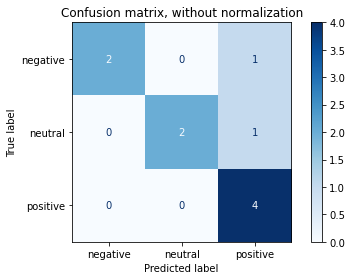

Normalized confusion matrix
[[0.66666667 0.         0.33333333]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]]


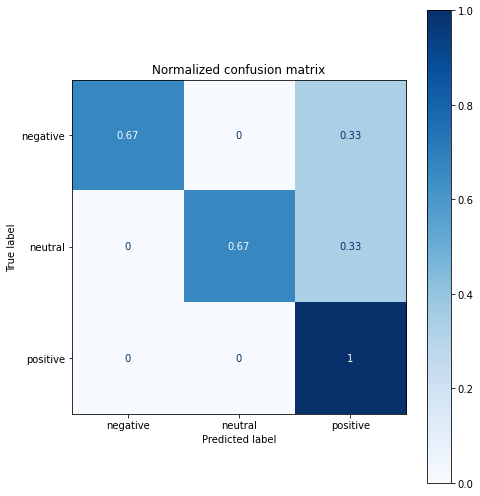

In [58]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

In [12]:
X_train

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,9970.807500,438.539167,-2154.481667,7.650833,5.875000,-34.748333,18646.232110,6.375279e+04,9.124581e+04,1.918069e+05,...,9208,-400,-3230,-1251,-3505,-812,6.060606,59.787601,0.782014,255.688941
16,10031.264167,472.477500,-1835.611667,8.840000,166.118333,-26.160833,17840.602716,5.776478e+04,1.438765e+05,8.734222e+04,...,9623,-98,-2851,-726,-980,-464,5.278592,60.745138,0.195503,177.552471
40,10049.785833,455.615000,-1762.213333,17.343333,56.928333,-22.474167,5969.444966,1.412229e+04,1.553355e+04,2.858925e+04,...,9745,87,-2119,-494,-621,-330,5.278592,27.499898,0.195503,136.506791
6,5376.797500,1503.052500,-8437.720000,19.523333,27.505000,-26.517500,97251.613160,2.290898e+03,5.507840e+04,5.989748e+03,...,4386,1232,-9211,-440,-3596,-421,8.211144,65.860742,0.391007,219.422635
32,9984.935833,-713.331667,-1164.724167,203.115000,353.302500,256.370833,54541.043383,1.775498e+06,1.552083e+06,4.099190e+05,...,9012,-3279,-3188,-2049,-2468,-1074,5.669599,104.478611,0.195503,615.363782
31,10089.513333,-221.710000,-635.435833,83.255000,28.630833,-55.211667,141308.081489,2.954583e+05,6.537641e+05,5.027494e+05,...,8047,-2225,-3178,-3538,-7840,-1545,11.339198,77.534874,0.195503,908.139702
46,9801.852500,507.884167,-2777.197500,5.575000,-51.168333,-23.740000,16688.892410,1.700688e+04,1.445685e+05,7.367511e+04,...,9454,165,-3452,-775,-993,-324,3.128055,41.376747,0.195503,124.618395
11,4627.124167,1073.733333,-8935.600000,31.050833,82.332500,-32.315833,35875.053749,3.017126e+03,2.688328e+04,5.557788e+03,...,3851,839,-9528,-177,-2572,-427,9.775171,53.993566,0.195503,320.425559
35,10070.205833,512.878333,-1600.771667,12.461667,51.780833,-17.839167,24124.635133,2.603971e+04,1.339400e+05,5.898879e+04,...,9515,-25,-2663,-1122,-2657,-415,5.278592,52.316402,0.195503,223.585062
24,10118.427500,894.044167,-1293.000833,72.940833,21.104167,-2.858333,2091.966410,1.694186e+03,3.828182e+04,8.776784e+03,...,9944,741,-1723,-306,-462,-115,17.204301,10.687885,0.977517,77.735242


# 特徴量選択

In [59]:
random.feature_importances_

array([0.06534988, 0.04253135, 0.05864252, 0.05303444, 0.02700631,
       0.01254758, 0.01205337, 0.03244781, 0.01752393, 0.0142781 ,
       0.0100124 , 0.01050575, 0.02681964, 0.04386972, 0.06368898,
       0.00859461, 0.02385862, 0.02555195, 0.08465306, 0.0092082 ,
       0.05180516, 0.01187313, 0.01904637, 0.03514748, 0.08539359,
       0.05207268, 0.01017862, 0.01118257, 0.01178063, 0.01651609,
       0.00950808, 0.01097367, 0.00540879, 0.0075507 , 0.0093044 ,
       0.01007981])

In [60]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs1 = SFS(RandomForestClassifier(bootstrap=False, criterion='gini', max_depth= 2, max_features= 1, min_samples_leaf= 10, min_samples_split= 2, n_estimators= 300),
#            k_features=36,   # いくつの特徴量を出力させたいのか
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='accuracy', # 'r2' なども選択できる。
#            cv=loo)

sfs1 = SFS(RandomForestClassifier(),
           k_features=36,   # いくつの特徴量を出力させたいのか
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy', # 'r2' なども選択できる。
           cv=loo)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.7min finished

[2021-04-29 00:10:52] Features: 1/36 -- score: 0.6578947368421053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.4min finished

[2021-04-29 00:13:16] Features: 2/36 -- score: 0.7368421052631579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  2.2min finished

[2021-04-29 00:15:29] Features: 3/36 -- score: 0.8421052631578947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [15]:
sfs1.k_feature_idx_

()

In [16]:
sfs1.k_feature_names_

()

In [17]:
pd.DataFrame.from_dict(sfs1.get_metric_dict())

""


In [18]:
sfs1.get_metric_dict()

{}

In [19]:
iris = datasets.load_iris()

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
cancer = load_breast_cancer()

NameError: name 'load_breast_cancer' is not defined

In [ ]:
cancer.names